In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [ ]:
drug = pd.read_csv("drug.csv")

In [ ]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,NaN,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
drug.isnull().sum()

Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64

In [ ]:
print(drug.dtypes)

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [ ]:
drug['Na_to_K'].fillna(drug['Na_to_K'].mean(), inplace=True)

In [ ]:
drug['Cholesterol'].fillna(drug['Cholesterol'].mode()[0], inplace=True)
drug['BP'].fillna(drug['BP'].mode()[0], inplace=True)
drug.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.126126
std,16.544315,7.199913
min,15.000000,6.269000
25%,31.000000,10.514250
50%,45.000000,13.952500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
#encoding of categorical variables
def encode(X):
    Drug_objects = X.select_dtypes(include=["object"])
    categorical_features = Drug_objects.astype('str')
    encoded_categorical_features = pd.DataFrame()

    for column in categorical_features.columns:
        encoder = LabelEncoder()
        encoded_categorical_features[column] = encoder.fit_transform(X[column])
        X[column] = encoded_categorical_features[column]

    return X

**Sex Encoding:**

F = 0

M = 1

**Cholestrol Encoding:**

High = 0

Normal = 1

**BP Encoding:**

High = 0

Low = 1

Normal = 2

**Drug Encoding:**

drugA = 0

drugB = 1

drugC = 2

drugX = 3

drugY = 4




In [ ]:
encoded_drug_data = encode(drug)
print(encoded_drug_data)

     Age  Sex  BP  Cholesterol    Na_to_K  Drug
0     23    0   0            0  25.355000     4
1     47    1   1            0  13.093000     2
2     47    1   1            0  10.114000     2
3     28    0   2            0  16.126126     3
4     61    0   1            0  18.043000     4
..   ...  ...  ..          ...        ...   ...
195   56    0   1            0  11.567000     2
196   16    1   1            0  12.006000     2
197   52    1   2            0   9.894000     3
198   23    1   2            0  14.020000     3
199   40    0   1            1  11.349000     3

[200 rows x 6 columns]


In [ ]:
X = encoded_drug_data.drop(['Drug'], axis=1)
Y = encoded_drug_data[['Drug']]

In [ ]:
# first expirement
from math import nan
num_expirements = 5

DT_Accuracy = []

DT_size = []

best_accuracy = 0

for i in range(num_expirements):
  X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

  Model = DecisionTreeClassifier()

  Model.fit(X_train, Y_train)

  y_predict = Model.predict(X_test)

  Accuracy = accuracy_score(Y_test,y_predict)

  if Accuracy >= best_accuracy:
        best_model = Model
        size = best_model.tree_.node_count
        best_accuracy = Accuracy

  DT_Accuracy.append(Accuracy)
  DT_size.append(Model.tree_.node_count)

  print(f"Experiment {i + 1}, Decision Tree Size: {Model.tree_.node_count}, Accuracy: {Accuracy}")

Experiment 1, Decision Tree Size: 15, Accuracy: 1.0
Experiment 2, Decision Tree Size: 15, Accuracy: 1.0
Experiment 3, Decision Tree Size: 15, Accuracy: 1.0
Experiment 4, Decision Tree Size: 15, Accuracy: 0.9833333333333333
Experiment 5, Decision Tree Size: 15, Accuracy: 0.9833333333333333


In [ ]:
print(f"The best Accuracy is {best_accuracy}, and the size of the tree with the best Accuracy is {size}")

The best Accuracy is 1.0, and the size of the tree with the best Accuracy is 15


In [ ]:
#second experiment
train_test_split_ratios = [0.3, 0.4, 0.5, 0.6, 0.7]

train_set_sizes = []
test_set_sizes = []
mean_accuracies = []
max_accuracies = []
min_accuracies = []
mean_tree_sizes = []
max_tree_sizes = []
min_tree_sizes = []

In [ ]:
#second experiment

for train_test_split_ratio in train_test_split_ratios:
    accuracies = []
    tree_sizes = []

    for seed in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 1 - train_test_split_ratio, random_state=seed)

        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        tree_size = model.tree_.node_count
        tree_sizes.append(tree_size)

    mean_accuracy = np.mean(accuracies)
    max_accuracy = np.max(accuracies)
    min_accuracy = np.min(accuracies)
    mean_accuracies.append(mean_accuracy)
    max_accuracies.append(max_accuracy)
    min_accuracies.append(min_accuracy)

    mean_tree_size = np.mean(tree_sizes)
    max_tree_size = np.max(tree_sizes)
    min_tree_size = np.min(tree_sizes)
    mean_tree_sizes.append(mean_tree_size)
    max_tree_sizes.append(max_tree_size)
    min_tree_sizes.append(min_tree_size)

    train_set_sizes.append(len(X_train))
    test_set_sizes.append(len(X_test))


In [ ]:

# Create a report
report = pd.DataFrame({
    'Train Set Size': train_set_sizes,
    'Test Set Size': test_set_sizes,
    'Mean Accuracy': mean_accuracies,
    'Max Accuracy': max_accuracies,
    'Min Accuracy': min_accuracies,
    'Mean Tree Size': mean_tree_sizes,
    'Max Tree Size': max_tree_sizes,
    'Min Tree Size': min_tree_sizes
})
print(report)

   Train Set Size  Test Set Size  Mean Accuracy  Max Accuracy  Min Accuracy  \
0              60            140       0.965714      0.985714      0.935714   
1              80            120       0.968333      0.983333      0.941667   
2             100            100       0.976000      0.990000      0.960000   
3             120             80       0.980000      0.987500      0.975000   
4             139             61       0.977049      1.000000      0.967213   

   Mean Tree Size  Max Tree Size  Min Tree Size  
0            13.4             17             11  
1            13.8             17             11  
2            13.4             15             11  
3            13.4             15             11  
4            13.4             15             11  


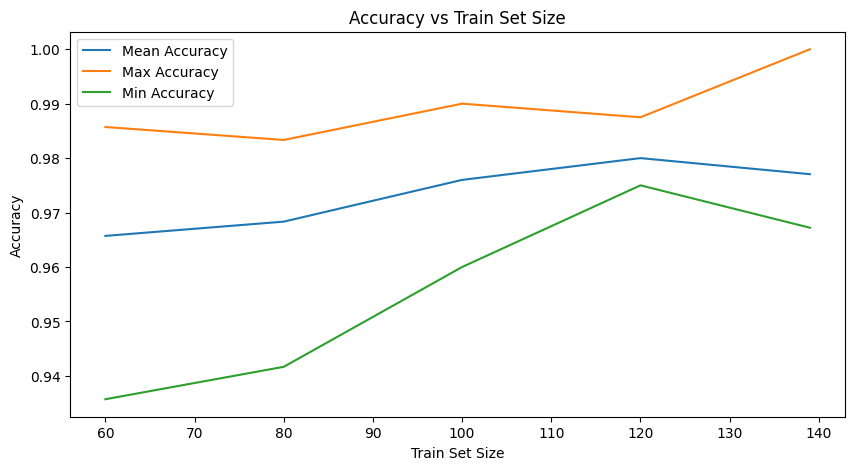

In [ ]:
#plot 1
plt.figure(figsize=(10, 5))

plt.plot(train_set_sizes, mean_accuracies, label='Mean Accuracy')
plt.plot(train_set_sizes, max_accuracies, label='Max Accuracy')
plt.plot(train_set_sizes, min_accuracies, label='Min Accuracy')
plt.xlabel('Train Set Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Train Set Size')
plt.legend()

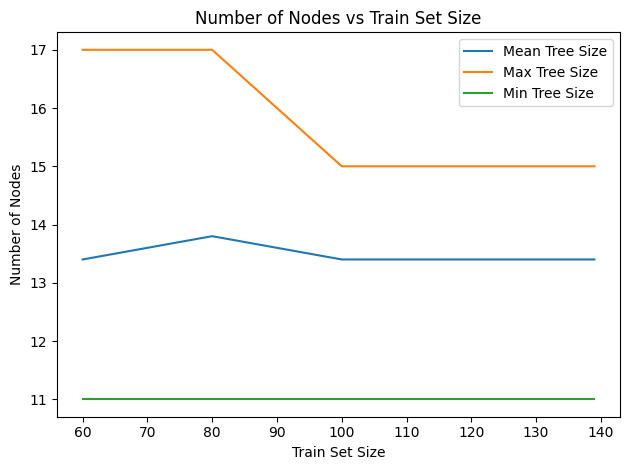

In [ ]:
# plot 2
plt.plot(train_set_sizes, mean_tree_sizes, label='Mean Tree Size')
plt.plot(train_set_sizes, max_tree_sizes, label='Max Tree Size')
plt.plot(train_set_sizes, min_tree_sizes, label='Min Tree Size')
plt.xlabel('Train Set Size')
plt.ylabel('Number of Nodes')
plt.title('Number of Nodes vs Train Set Size')
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
# diabetes data preprocessing
diabetes = pd.read_csv("diabetes.csv")


In [87]:
print(diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [88]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
print(diabetes.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [90]:
diabetes.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values

In [91]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [92]:
def min_max_scaling(diabetes):
    min_vals = diabetes.min()
    max_vals = diabetes.max()
    scaled_data = (diabetes - min_vals) / (max_vals - min_vals)
    return scaled_data

In [93]:
scaled_data = min_max_scaling(diabetes)

In [94]:
scaled_data.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [95]:
X = scaled_data.drop(['Outcome'], axis=1)
Y = scaled_data[['Outcome']]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 43)

In [96]:
print(X_train,X_test,Y_train,Y_test )

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
532     0.058824  0.432161       0.540984       0.525253  0.076832  0.615499   
617     0.117647  0.341709       0.508197       0.131313  0.017730  0.299553   
17      0.411765  0.537688       0.606557       0.000000  0.000000  0.441133   
741     0.176471  0.512563       0.360656       0.202020  0.111111  0.459016   
234     0.176471  0.371859       0.557377       0.282828  0.053191  0.442623   
..           ...       ...            ...            ...       ...       ...   
16      0.000000  0.592965       0.688525       0.474747  0.271868  0.682563   
58      0.000000  0.733668       0.672131       0.000000  0.000000  0.603577   
277     0.000000  0.522613       0.524590       0.232323  0.137116  0.414307   
255     0.058824  0.567839       0.524590       0.353535  0.000000  0.500745   
320     0.235294  0.648241       0.491803       0.121212  0.273050  0.409836   

     DiabetesPedigreeFunction       Age

In [97]:
def euclidean_distance(x1, x2):
    x1 = np.asarray(x1.iloc[1:], dtype=np.float64)
    x2 = np.asarray(x2.iloc[1:], dtype=np.float64)
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [98]:
def knn_predict(x_test, X_train, y_train, k):
    distances = np.array([euclidean_distance(x_test, X_train.iloc[i, :]) for i in range(X_train.shape[0])])
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_neighbors_labels = y_train.iloc[nearest_neighbors].values

    return nearest_neighbors_labels, distances[nearest_neighbors]

In [102]:
def calculate(X_train, X_test, Y_train, Y_test, k):
    m, n = X_test.shape
    flag = False
    correct_predictions = 0
    predicted = []
    output = 2
    for t in range(m):
        knn_prediction, nearest_neighbors_distances = knn_predict(X_test.iloc[t, :], X_train, Y_train, k)
        freq1 = np.sum(knn_prediction == 1)
        freq0 = np.sum(knn_prediction == 0)

        if freq0 == freq1:
            class_one_w8 = 0
            class_zero_w8 = 0

            for i in range(k):
                if knn_prediction[i] == 0:
                    class_zero_w8 += 1 / (nearest_neighbors_distances[i])
                else:
                    class_one_w8 += 1 / (nearest_neighbors_distances[i])

            if class_zero_w8 > class_one_w8:
                output = 0
            else:
                output = 1
        else:
            if freq0 > freq1:
                output = 0
            else:
                output = 1
        predicted.append(output)
        if(m>1):
          flag = True
          correct_predictions += (Y_test.iloc[t] == output)


    if(flag):
        return correct_predictions
    else:
        return predicted


In [103]:
def calc_accuracy(correct_predictions, Y_test):
      accuracy = correct_predictions / len(Y_test) * 100
      return accuracy



k value: 1
Number of correctly classified instances: 168
Total number of instances: 231
Accuracy: 72.72727272727273%

k value: 2
Number of correctly classified instances: 168
Total number of instances: 231
Accuracy: 72.72727272727273%

k value: 3
Number of correctly classified instances: 166
Total number of instances: 231
Accuracy: 71.86147186147186%

k value: 4
Number of correctly classified instances: 168
Total number of instances: 231
Accuracy: 72.72727272727273%

k value: 5
Number of correctly classified instances: 169
Total number of instances: 231
Accuracy: 73.16017316017316%

k value: 6
Number of correctly classified instances: 173
Total number of instances: 231
Accuracy: 74.89177489177489%

k value: 7
Number of correctly classified instances: 172
Total number of instances: 231
Accuracy: 74.45887445887446%

k value: 8
Number of correctly classified instances: 171
Total number of instances: 231
Accuracy: 74.02597402597402%

k value: 9
Number of correctly classified instances: 17

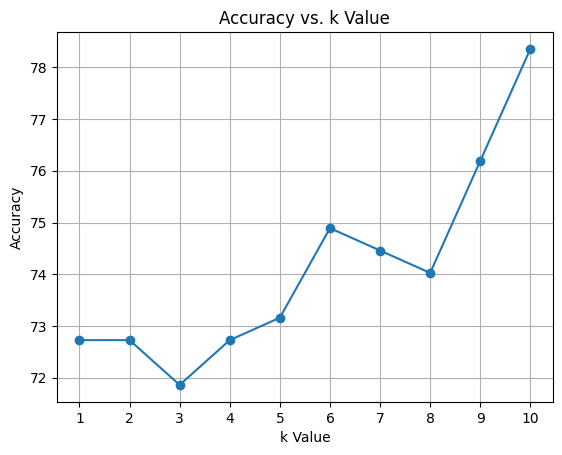

In [113]:
avg_accuracy = 0
j = 10
accuracies = []

for k in range(1, j+1):
    correct_predictions = calculate(X_train, X_test, Y_train, Y_test, k)
    accuracy = calc_accuracy(correct_predictions, Y_test)
    accuracies.append(accuracy)
    avg_accuracy += accuracy.item()  # Use .item() to extract scalar value
    correct_predictions_value = correct_predictions.values[0] if isinstance(correct_predictions, pd.Series) else correct_predictions
    accuracy_value = accuracy.values[0] if isinstance(accuracy, pd.Series) else accuracy
    print(f'\nk value: {k}\nNumber of correctly classified instances: {correct_predictions_value}\nTotal number of instances: {len(Y_test)}\nAccuracy: {accuracy_value}%')

# Extract scalar values from pandas Series
accuracies_values = [accuracy.item() for accuracy in accuracies]

# Calculate and print average accuracy
avg_accuracy /= j
print(f'\nAverage Accuracy: {avg_accuracy:.6f}%')

# Find the highest accuracy and its position
max_accuracy = max(accuracies_values)
max_position = accuracies_values.index(max_accuracy) + 1  # Adding 1 to convert to 1-based index

# Print the highest accuracy and its position
print(f'Highest Accuracy: {max_accuracy:.2f}% at position {max_position}')


plt.plot(range(1, j+1), accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.xticks(range(1, j+1))
plt.grid(True)
plt.show()

In [106]:
data = [
    [25, 50000, 0],
    [30, 60000, 1],
    [35, 75000, 1],
    [40, 80000, 0]
]

# Column names
columns = ['Age', 'Income', 'Label']

# Create a DataFrame for training data
df_train = pd.DataFrame(data, columns=columns)
X_train2 = df_train.drop(['Label'], axis=1)
Y_train2 = df_train['Label']

# Create a new_data DataFrame for testing
new_data = {'Age': [32], 'Income': [65000]}
new_row = pd.DataFrame(new_data)

# Use the calculate function with k = 3
k_value = 3
predicted = calculate(X_train2, new_row, Y_train2, None, k_value)

# Add the predicted label to the new_data DataFrame
new_row['Label'] = predicted

# Print the test case columns after predicting the label
print(new_row[['Age', 'Income', 'Label']])


   Age  Income  Label
0   32   65000      1


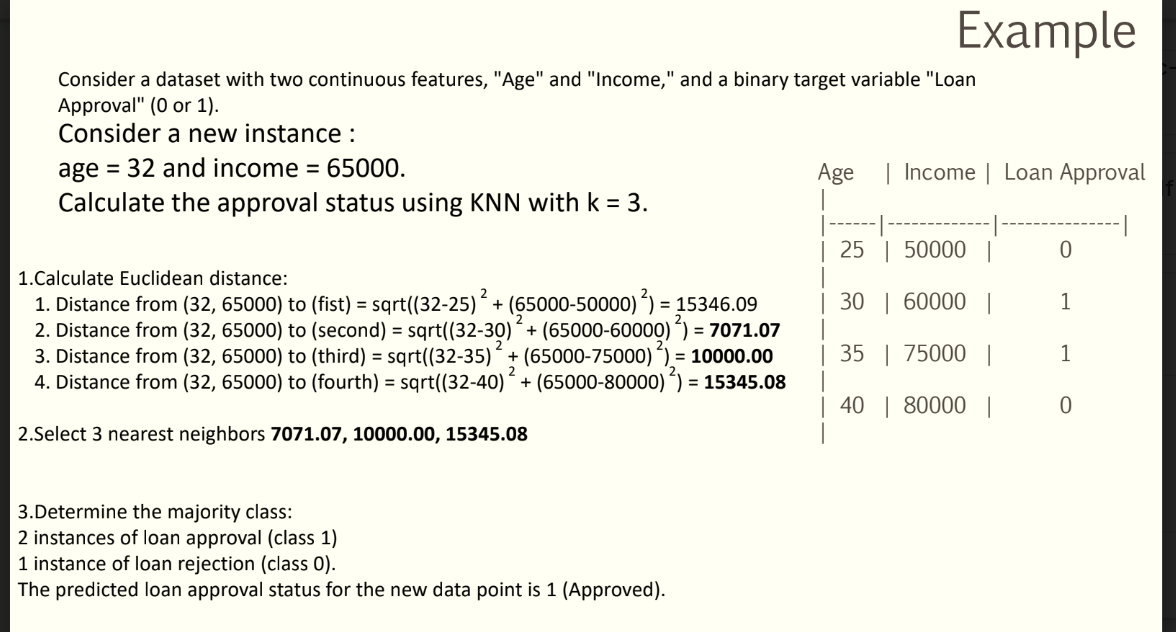

> Indented block

